In [2]:
%matplotlib inline
import networkx as nx
import csv
import re
import pandas as pd
import numpy as np
try:
    import statistics
    from statistics import StatisticsError
except ImportError:
    print('ImportError: No module named statistics? (python 3)')

import random
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from sklearn.decomposition import TruncatedSVD
import itertools
from sklearn import mixture


def L1 (x,y):
    dist = 0
    if len(x)==len(y):
        for i in range(len(x)):
            dist += math.fabs(x[i]-y[i])
        return(dist)
    else:
        print('vectors must be equal length for L1')
        return (None)


ImportError: No module named statistics? (python 3)


In [3]:
#!
# This code here makes the nx.Graph
G=nx.Graph()

m=0 # these two counters 
n=0 # arn't important

# with open('training.1600000.processed.noemoticon.csv', encoding='latin-1') as f_in:
with open('training.1600000.processed.noemoticon.csv') as f_in:
    for line in f_in: 
        lineX = list(csv.reader(line, skipinitialspace=True))
        G.add_node(lineX[8][0])
        if '@' in lineX[10][0]:
            m+=1
            for t in re.split('[^a-zA-Z\_\@]', lineX[10][0]):
                if t!='' and t[0]=='@' and t!='@':
                    G.add_edge(lineX[8][0],t[1:])
                    n+=1
        if n%100000==0:
            print(n)
print(nx.number_of_nodes(G))

100000
100000
100000
100000
100000
100000
100000
200000
200000
300000
300000
400000
500000
600000
700000
889334


In [4]:
len(G)

889334

In [5]:
len(G.edges())

616462

In [6]:
# Finding the largest connected_component
LargestCC = max(nx.connected_component_subgraphs(G), key=len) # largest connected component
print(nx.number_of_nodes(LargestCC))
# del G

339766


In [7]:
#!
# removes self-loops from the graph, this is needed to get nx.k_core
LargestCC.remove_edges_from(LargestCC.selfloop_edges())

core7 = nx.k_core(LargestCC,7)
# del LargestCC

In [8]:
# find the fiedler vector, and use it to partition the graph

f = nx.fiedler_vector(core7)
s = np.zeros(len(f),dtype='int')
s[f>0]=1

# this is the positions we will use for each graph
pos = nx.spring_layout(core7)

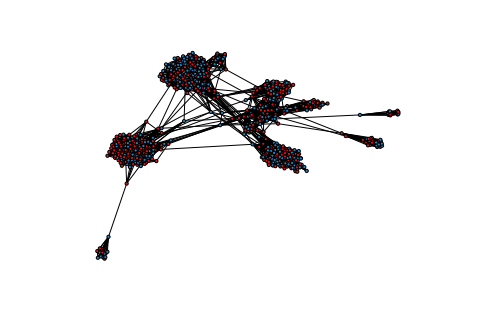

In [9]:
# draw partition
colors = ['#d7191c', '#2b83ba'] # red and blue
node_colors = [colors[s[v]] for v in range(nx.number_of_nodes(core7))]
nx.draw(core7,pos=pos, node_color=node_colors,node_size=10)


In [10]:
# this makes the laplacian matrix to do the spectral clustering
L = nx.laplacian_matrix(core7).todense()
w, v = np.linalg.eig(L)
v = np.array(v)
worder = np.argsort(w)

# X = v @ np.diag(w) # python 3
X = np.matmul( v , np.diag(w) )
    
X = X[:,worder]

In [11]:
# based on the graph above, k=6 was chosen. k=4 was what we were taught to
# choose, because it's the "L" in the graph. Though that didn't look good,
# so I increased k to 6.
# this runs k-means for the next code
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit_predict(X[:,1:3])
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

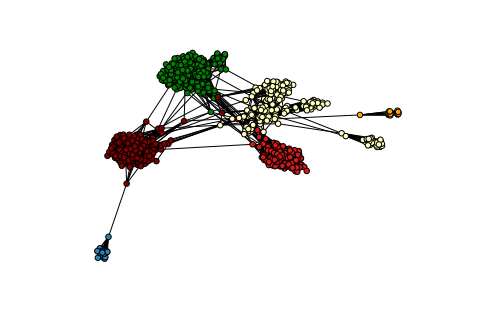

In [12]:
colors = ['#d7191c', '#ffffbf', '#2b83ba', 'green','orange','maroon']
node_colors = [colors[labels[i]] for i in range(nx.number_of_nodes(core7))]
nx.draw(core7, pos = pos, node_color=node_colors,node_size=30)

In [13]:
# Now we switch from the graphical analysis to LSA

In [14]:
# #!
# # this reads in the tweets
# # then simply parses user ID into ID_list
# # and the tweet text into TextList
# TextList = []
# ID_list = []
# n=0
# # with open('training.1600000.processed.noemoticon.csv', encoding='latin-1') as f_in:
# with open('training.1600000.processed.noemoticon.csv') as f_in:
#     for line in f_in:
#         lineX = list(csv.reader(line, skipinitialspace=True))
#         TextList.append(lineX[10][0])
#         ID_list.append(lineX[8][0])
#         n=n+1
#         if n%100000==0:
#             print(n)
# print(n)

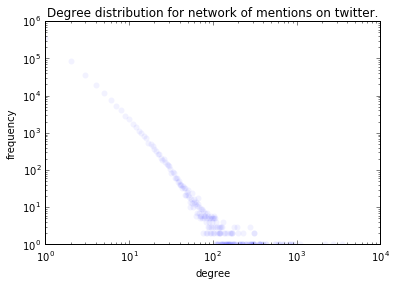

In [24]:
import networkx as nx

import matplotlib.pyplot as plt

deg_hist = nx.degree_histogram(G)

# plt.scatter( range(len(deg_hist)), deg_hist)
# plt.show()

fig = plt.figure()
ax = plt.gca()
ax.plot(range(len(deg_hist)),deg_hist, 'o', c='blue', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('degree')
ax.set_ylabel('frequency')
ax.set_title('Degree distribution for network of mentions on twitter.')



In [15]:
"""0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
1 - the id of the tweet (2087)
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
3 - the query. If there is no query, then this value is NO_QUERY.
4 - the user that tweeted
5 - the text of the tweet"""
cols = ['polarity','tweetID','date','Query','UserID','text']

df = pd.read_csv('training.1600000.processed.noemoticon.csv',names=cols,encoding='latin-1')#names=m_cols ,

In [25]:
len(df['UserID'].unique())

659775

In [128]:
TextListA = list(df.text)

In [17]:
# #!
# #takes a long time
# # vectorize TextList to dtm
# # if you can get the snowball stemmer to work, that would be useful

# vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8)
# dtm = vectorizer.fit_transform(TextList)
# # del TextList

In [18]:
#!
#takes a long time
# vectorize TextList to dtm
# if you can get the snowball stemmer to work, that would be useful

vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8)
dtm = vectorizer.fit_transform(TextListA)
del TextListA

In [ ]:
# vectorizer.get_feature_names()

In [ ]:
vectorizer.get_stop_words()

In [19]:
#!
# compute svd of dtm
svd = TruncatedSVD(n_components=100, n_iter=4)
svdOutput = svd.fit_transform(dtm)

In [39]:
svdOutput.shape

(1600000, 25)

In [20]:
#!
# this is the model I went with for LSA

gmm = mixture.GMM(n_components=10, covariance_type='full')
# gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(svdOutput[:,:15])
pred = gmm.predict(svdOutput[:,:15])

In [129]:
#!
# this is the model I went with for LSA

vectorizer_half = TfidfVectorizer(stop_words='english', min_df=10,max_df=0.5)
dtm_half = vectorizer_half.fit_transform(TextListA)

#!
# compute svd of dtm
svd_half = TruncatedSVD(n_components=50, n_iter=4)
svdOutput_half = svd_half.fit_transform(dtm_half)

gmm5 = mixture.GMM(n_components=5, covariance_type='full')
# gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
gmm5.fit(svdOutput_half[:,:15])
y = gmm5.predict(svdOutput_half[:,:15])

In [21]:
# this converts the GMM result from classifying tweets
# into classifying users
ID_Pred = {}
for i in range(len(ID_list)):
    ID = ID_list[i]
    if ID in ID_Pred:
        ID_Pred[ID].append(pred[i])
    else:
        ID_Pred[ID]=[pred[i]]

NameError: name 'ID_list' is not defined

In [ ]:
# # this converts the GMM result from classifying tweets
# # into classifying users
# # this also classifies all users, not just core7
# ID_Pred = {}
# for i in range(len(ID_list)):
#     ID = ID_list[i]
#     if ID in ID_Pred:
#         ID_Pred[ID].append(pred[i])
#     else:
#         ID_Pred[ID]=[pred[i]]
        
# colors = ['#d7191c', '#ffffbf', '#2b83ba', 'green','orange','maroon','black']
# node_colors = []
# for g in core7: # classify the nodes, based off their tweets
#     try:
#         try: # if there is only one mode of groups, classify the user as the mode
#             X = statistics.mode(ID_Pred[g])
#             node_colors.append(colors[X])
#         except StatisticsError: # if there is no mode, pick a tweet at random, and classify the user as that tweet's group
#             node_colors.append(colors[ID_Pred[g][random.randint(0,len(ID_Pred[g])-1)]])
            
#     except KeyError: # if the node never tweeted (was only tweeted at)
#         node_colors.append(colors[6]) # make it black

In [ ]:
# draw the core7 based on LSA predictions, only to make it easier to
# compare to our spectral clustering
nx.draw(core7,pos=pos, node_color=node_colors,node_size=10)

In [ ]:
#!
# this gives the top terms of each eigenvector for our LSA
# the groups aren't exactly these values, but it's similar.
# you can also plot the nodes , with these eigenvectors as the axis
# being a good way to visualize the results of LSA

terms = vectorizer.get_feature_names()

for i in range(0,20):
    top = np.argsort(svd.components_[i])
    topterms = [terms[top[f]] for f in range(60,120)]
    print()
    print (i,topterms)


In [24]:
means = gmm.means_

In [136]:
gmm5.means_[0,:].shape

(15,)

In [137]:
means5 = gmm5.means_
# mean5_vecs = np.array(means5)
dfs5 = []
for i in xrange(means5.shape[0]):
    vec = np.zeros(100)
    vec[:15] = mean_vecs[i,:]
    cat = svd.inverse_transform(vec.reshape(1,-1))
    top_feats = []
    for i in np.argsort(cat).reshape(-1):
        top_feats.append((features[i], cat.reshape(-1)[i]))
    mydf = pd.DataFrame(top_feats)
    mydf.columns = ['feature', 'tfidf']
    dfs5.append(mydf)

In [44]:
mean_vecs[0,:].shape

(15,)

In [50]:
vec = np.zeros(100)
vec[:15] = mean_vecs[0,:]
# vec
cat = svd.inverse_transform(vec.reshape(1,-1))

In [115]:
mean_vecs = np.array(means)
dfs = []
for i in xrange(10):
    vec = np.zeros(100)
    vec[:15] = mean_vecs[i,:]
    cat = svd.inverse_transform(vec.reshape(1,-1))
    top_feats = []
    for i in np.argsort(cat).reshape(-1):
        top_feats.append((features[i], cat.reshape(-1)[i]))
    mydf = pd.DataFrame(top_feats)
    mydf.columns = ['feature', 'tfidf']
    dfs.append(mydf)
# return df

In [22]:
# Xtr = vec_pipe.fit_transform(X)
# vec = vec_pipe.named_steps['vec']



# features = vec.get_feature_names()

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [ ]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [ ]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [28]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [106]:
for i in xrange(len(dfs)):
    dfs[i].label = i

In [110]:
# plot_tfidf_classfeats_h(dfs[:3])
# 

In [116]:
dff = pd.concat(dfs, axis=1)

In [127]:
dff[-700:-650]

,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf
101548,plans,0.000506,road,0.000421,dress,0.000200,ill,0.000435,24,0.000564,sunny,0.000404,lakers,0.000624,mileycyrus,0.000568,wondering,0.000350,tooo,0.000474
101549,alright,0.000506,needed,0.000421,simple,0.000200,forever,0.000438,demi,0.000565,meant,0.000404,different,0.000625,lakers,0.000569,planned,0.000351,doesnt,0.000474
101550,taken,0.000507,paid,0.000422,hun,0.000200,season,0.000438,record,0.000566,fb,0.000404,xo,0.000626,fact,0.000571,single,0.000354,holidays,0.000476
101551,airport,0.000507,easy,0.000422,kill,0.000201,babygirlparis,0.000438,soooo,0.000567,number,0.000404,starts,0.000626,team,0.000571,whats,0.000355,cd,0.000477
101552,paper,0.000508,doctors,0.000423,liked,0.000202,hanging,0.000439,random,0.000567,def,0.000405,save,0.000627,hates,0.000571,twitterville,0.000356,drunk,0.000477
101553,card,0.000509,walking,0.000423,tummy,0.000202,question,0.000439,eh,0.000568,single,0.000406,film,0.000627,hmmm,0.000572,agree,0.000356,dogs,0.000478
101554,luck,0.000509,says,0.000423,camera,0.000202,brazil,0.000440,breakfast,0.000569,thoughts,0.000406,worried,0.000627,facebook,0.000573,email,0.000357,cried,0.000478
101555,band,0.000509,cos,0.000424,lately,0.000203,ang,0.000440,join,0.000569,tuesday,0.000406,deal,0.000632,goodbye,0.000573,isnt,0.000358,blackberry,0.000479
101556,worked,0.000510,bummer,0.000424,relax,0.000203,dark,0.000440,bet,0.000569,smell,0.000406,huh,0.000633,bummer,0.000573,dead,0.000358,isnt,0.000479
101557,slow,0.000510,straight,0.000424,confused,0.000203,wasn,0.000441,evening,0.000570,woo,0.000406,met,0.000633,moon,0.000574,staying,0.000362,park,0.000479


In [139]:
dff5 = pd.concat(dfs5, axis=1)

In [145]:
dff5[-500:-450]

,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf,feature,tfidf
101748,slept,0.000726,quite,0.000596,cleaning,0.000289,mr,0.000593,busy,0.000749
101749,12,0.000729,site,0.000602,ipod,0.000289,design,0.000594,eating,0.000751
101750,fair,0.000730,post,0.000606,evening,0.000290,ng,0.000595,store,0.000754
101751,exactly,0.000731,figure,0.000607,test,0.000290,course,0.000595,goodbye,0.000756
101752,saturday,0.000733,moving,0.000607,site,0.000290,comments,0.000596,minutes,0.000757
101753,album,0.000733,kill,0.000608,11,0.000290,air,0.000596,weather,0.000758
101754,test,0.000735,season,0.000609,congrats,0.000291,cold,0.000598,rest,0.000759
101755,broken,0.000736,relax,0.000610,upset,0.000291,park,0.000600,cd,0.000763
101756,mum,0.000737,woo,0.000610,flu,0.000291,laptop,0.000606,weeks,0.000763
101757,running,0.000738,ipod,0.000610,tour,0.000291,reason,0.000606,june,0.000764
